In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Data


## Importing and Reading Data

In [4]:
# data=pd.read_csv("/content/drive/My Drive/CAPSTONE/incident_event_log.csv")
data = pd.read_csv('incident_event_log.csv')
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


## Exploratory Data Analysis

In [5]:
print('The number of rows in the dataset is', data.shape[0])
print('The number of columns in the dataset is', data.shape[1])



The number of rows in the dataset is 141712
The number of columns in the dataset is 36


In [6]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [7]:
numerical_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
print(numerical_data.shape,categorical_data.shape)
print('The number of rows in the Numerical data is', numerical_data.shape[0])
print('The number of columns in the Numerical data is', numerical_data.shape[1])
print('The number of rows in the Categorical data is', categorical_data.shape[0])
print('The number of columns in the Categorical data is', categorical_data.shape[1])



(141712, 3) (141712, 33)
The number of rows in the Numerical data is 141712
The number of columns in the Numerical data is 3
The number of rows in the Categorical data is 141712
The number of columns in the Categorical data is 33


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

feature:reassignment_count


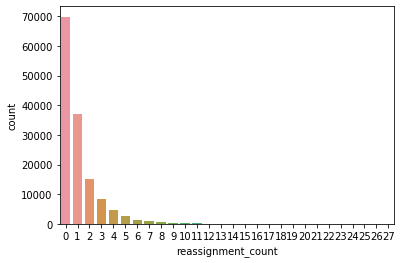

feature:reopen_count


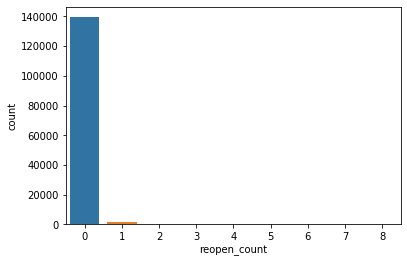

feature:sys_mod_count


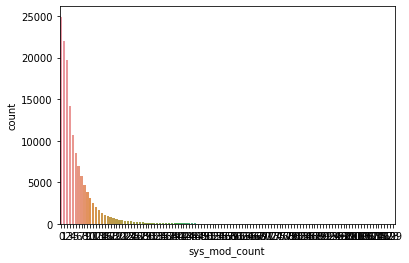

In [9]:
for i in numerical_data:
    if len(data[i].unique()):
        print(f"feature:{i}")
        sns.countplot(data[i])
        plt.show()
        

In [10]:
for i in categorical_data:
    print(i)
    print('Number of Categories in',i, 'is', data[i].nunique() )
    print(data[i].value_counts()/data.shape[0]*100)
    print('*'*50)

number
Number of Categories in number is 24918
INC0019396    0.040928
INC0044260    0.039517
INC0005927    0.032460
INC0020718    0.031755
INC0011206    0.031049
INC0025734    0.030343
INC0007349    0.030343
INC0012815    0.028226
INC0032450    0.026815
INC0003419    0.026815
INC0020849    0.026815
INC0015902    0.026109
INC0002129    0.025404
INC0019739    0.024698
INC0010322    0.023992
INC0007229    0.023287
INC0004305    0.023287
INC0009986    0.023287
INC0025696    0.023287
INC0026226    0.023287
INC0003256    0.023287
INC0031099    0.022581
INC0025234    0.022581
INC0012879    0.022581
INC0011262    0.022581
INC0003982    0.021875
INC0025993    0.021875
INC0020627    0.021875
INC0012895    0.021875
INC0004210    0.021170
                ...   
INC0026966    0.001411
INC0021035    0.001411
INC0028051    0.001411
INC0029461    0.001411
INC0022432    0.001411
INC0013463    0.001411
INC0013790    0.001411
INC0011697    0.001411
INC0024538    0.001411
INC0004406    0.001411
INC0007987

?                  37.453427
4/7/2016 14:50      0.039517
15/3/2016 15:19     0.036694
19/4/2016 11:32     0.033166
24/5/2016 09:14     0.033166
4/3/2016 10:31      0.032460
10/3/2016 09:39     0.031049
3/3/2016 16:23      0.028932
7/3/2016 10:40      0.028932
23/3/2016 08:57     0.028932
15/3/2016 13:59     0.028226
30/3/2016 08:23     0.028226
19/5/2016 09:09     0.027521
7/3/2016 12:02      0.026815
7/3/2016 09:25      0.026815
7/3/2016 11:17      0.026815
7/3/2016 13:49      0.026815
6/4/2016 14:31      0.026109
3/3/2016 16:47      0.025404
3/3/2016 17:16      0.025404
8/3/2016 08:58      0.025404
7/3/2016 15:38      0.024698
4/3/2016 14:46      0.024698
15/3/2016 10:55     0.024698
31/3/2016 08:36     0.024698
21/3/2016 09:46     0.024698
30/5/2016 08:16     0.024698
17/3/2016 17:56     0.023992
29/2/2016 09:13     0.023992
23/5/2016 14:54     0.023992
                     ...    
20/4/2016 15:29     0.001411
19/4/2016 16:26     0.001411
27/3/2016 18:29     0.001411
9/3/2016 08:54

Name: subcategory, Length: 255, dtype: float64
**************************************************
u_symptom
Number of Categories in u_symptom is 526
Symptom 491    36.683555
?              23.261262
Symptom 534     3.922745
Symptom 387     1.822711
Symptom 4       1.786722
Symptom 116     1.689342
Symptom 532     1.479762
Symptom 571     1.249718
Symptom 494     0.964632
Symptom 296     0.958987
Symptom 506     0.863018
Symptom 10      0.829852
Symptom 208     0.784690
Symptom 470     0.741645
Symptom 118     0.728238
Symptom 120     0.656261
Symptom 102     0.620978
Symptom 458     0.599102
Symptom 87      0.584989
Symptom 54      0.512307
Symptom 105     0.505250
Symptom 6       0.495371
Symptom 127     0.457971
Symptom 517     0.423394
Symptom 117     0.407869
Symptom 70      0.402224
Symptom 592     0.396579
Symptom 119     0.385994
Symptom 295     0.379643
Symptom 455     0.325308
                 ...    
Symptom 290     0.001411
Symptom 453     0.001411
Symptom 175     0.000706
S

Name: caused_by, dtype: float64
**************************************************
closed_code
Number of Categories in closed_code is 18
code 6     61.097860
code 7     14.630377
code 9      9.570114
code 8      3.984137
code 5      3.153579
code 1      2.303969
code 10     1.184092
code 11     1.053545
code 4      0.803743
code 16     0.769871
?           0.503839
code 3      0.429039
code 2      0.246274
code 15     0.129135
code 17     0.081151
code 13     0.041634
code 12     0.009174
code 14     0.008468
Name: closed_code, dtype: float64
**************************************************
resolved_by
Number of Categories in resolved_by is 217
Resolved by 15     10.881930
Resolved by 11      8.503161
Resolved by 103     3.782319
Resolved by 177     2.689257
Resolved by 53      2.566473
Resolved by 62      2.510726
Resolved by 133     2.177656
Resolved by 166     1.794485
Resolved by 180     1.731681
Resolved by 22      1.648414
Resolved by 32      1.632889
Resolved by 227     1.5686

### Null Values Treatment

In [11]:
data.isnull().sum()

number                     0
incident_state             0
active                     0
reassignment_count         0
reopen_count               0
sys_mod_count              0
made_sla                   0
caller_id                  0
opened_by                  0
opened_at                  0
sys_created_by             0
sys_created_at             0
sys_updated_by             0
sys_updated_at             0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
cmdb_ci                    0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
knowledge                  0
u_priority_confirmation    0
notify                     0
problem_id                 0
rfc                        0
vendor                     0
caused_by                  0
closed_code                0
resolved_by                0
resolved_at   

In [12]:
data = data.replace('?',np.nan)
print('The Null Values present in the data are: ')
data.isnull().sum()[data.isnull().sum()>0]

The Null Values present in the data are: 


caller_id               29
opened_by             4835
sys_created_by       53076
sys_created_at       53076
location                76
category                78
subcategory            111
u_symptom            32964
cmdb_ci             141267
assignment_group     14213
assigned_to          27496
problem_id          139417
rfc                 140721
vendor              141468
caused_by           141689
closed_code            714
resolved_by            226
resolved_at           3141
dtype: int64

In [13]:
missing_val_per=round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)
missing_val_per



caused_by                  99.98
vendor                     99.83
cmdb_ci                    99.69
rfc                        99.30
problem_id                 98.38
sys_created_at             37.45
sys_created_by             37.45
u_symptom                  23.26
assigned_to                19.40
assignment_group           10.03
opened_by                   3.41
resolved_at                 2.22
closed_code                 0.50
resolved_by                 0.16
subcategory                 0.08
category                    0.06
location                    0.05
caller_id                   0.02
reassignment_count          0.00
active                      0.00
incident_state              0.00
reopen_count                0.00
sys_mod_count               0.00
made_sla                    0.00
opened_at                   0.00
closed_at                   0.00
sys_updated_by              0.00
sys_updated_at              0.00
contact_type                0.00
impact                      0.00
urgency   

In [14]:
data1 = data.drop(['caused_by','vendor','cmdb_ci','rfc','problem_id','sys_created_at','sys_created_by'],axis=1)

In [15]:
data1.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [16]:
missing_val_per=round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False)
missing_val_per



u_symptom                  23.26
assigned_to                19.40
assignment_group           10.03
opened_by                   3.41
resolved_at                 2.22
closed_code                 0.50
resolved_by                 0.16
subcategory                 0.08
category                    0.06
location                    0.05
caller_id                   0.02
opened_at                   0.00
sys_mod_count               0.00
made_sla                    0.00
reassignment_count          0.00
active                      0.00
incident_state              0.00
reopen_count                0.00
closed_at                   0.00
sys_updated_by              0.00
sys_updated_at              0.00
contact_type                0.00
impact                      0.00
urgency                     0.00
priority                    0.00
knowledge                   0.00
u_priority_confirmation     0.00
notify                      0.00
number                      0.00
dtype: float64

In [17]:
numerical_data1 = data1.select_dtypes(include=[np.number])
categorical_data1 = data1.select_dtypes(exclude=[np.number])
print(numerical_data1.shape,categorical_data1.shape)
print('The number of rows in the Numerical data after dropping null values', numerical_data1.shape[0])
print('The number of columns in the Numerical data after dropping null values', numerical_data1.shape[1])
print('The number of rows in the Categorical data after dropping null values', categorical_data1.shape[0])
print('The number of columns in the Categorical data after dropping null values', categorical_data1.shape[1])


(141712, 3) (141712, 26)
The number of rows in the Numerical data after dropping null values 141712
The number of columns in the Numerical data after dropping null values 3
The number of rows in the Categorical data after dropping null values 141712
The number of columns in the Categorical data after dropping null values 26


In [18]:
for i in ['u_symptom','assigned_to','assignment_group','opened_by','closed_code','resolved_by','subcategory','category','location','caller_id']:
    data1[i]=data1[i].fillna(data1[i].mode()[0])
    

In [19]:
missing_val_per=round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False)
missing_val_per

resolved_at                2.22
closed_at                  0.00
location                   0.00
incident_state             0.00
active                     0.00
reassignment_count         0.00
reopen_count               0.00
sys_mod_count              0.00
made_sla                   0.00
caller_id                  0.00
opened_by                  0.00
opened_at                  0.00
sys_updated_by             0.00
sys_updated_at             0.00
contact_type               0.00
category                   0.00
subcategory                0.00
u_symptom                  0.00
impact                     0.00
urgency                    0.00
priority                   0.00
assignment_group           0.00
assigned_to                0.00
knowledge                  0.00
u_priority_confirmation    0.00
notify                     0.00
closed_code                0.00
resolved_by                0.00
number                     0.00
dtype: float64

In [20]:
data1['resolved_at'].fillna(method='ffill', inplace=True)

In [21]:
missing_val_per=round((data1.isnull().sum() * 100/ len(data1)),2).sort_values(ascending=False)
missing_val_per

closed_at                  0.0
location                   0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
category                   0.0
resolved_at                0.0
subcategory                0.0
u_symptom                  0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
closed_code                0.0
resolved_by                0.0
number                     0.0
dtype: float64

### Outliers

In [22]:
numerical_data1 = data1.select_dtypes(include=[np.number])
categorical_data1 = data1.select_dtypes(exclude=[np.number])
print(numerical_data1.shape,categorical_data1.shape)
print('The number of rows in the Numerical data after dropping null values', numerical_data1.shape[0])
print('The number of columns in the Numerical data after dropping null values', numerical_data1.shape[1])
print('The number of rows in the Categorical data after dropping null values', categorical_data1.shape[0])
print('The number of columns in the Categorical data after dropping null values', categorical_data1.shape[1])


(141712, 3) (141712, 26)
The number of rows in the Numerical data after dropping null values 141712
The number of columns in the Numerical data after dropping null values 3
The number of rows in the Categorical data after dropping null values 141712
The number of columns in the Categorical data after dropping null values 26


reassignment_count


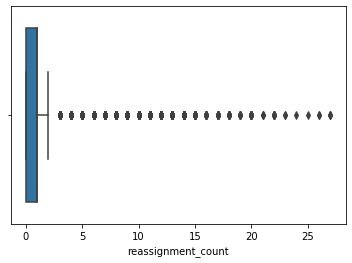

**************************************************
reopen_count


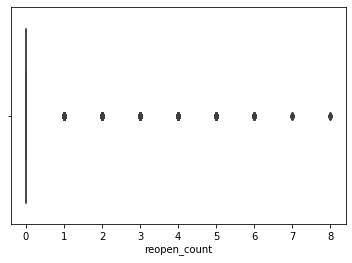

**************************************************
sys_mod_count


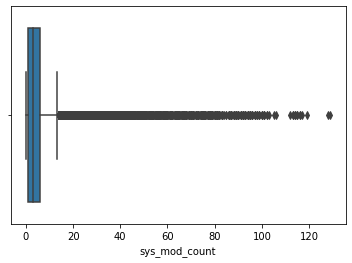

**************************************************


In [23]:
for i in numerical_data1:
    print(i)
    sns.boxplot(data1[i])
    plt.show()
    print('*'*50)

In [24]:
#Converting the numerical features to categorical
for i in numerical_data1:
    data1[i] = data1[i].astype('object')

In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null object
reopen_count               141712 non-null object
sys_mod_count              141712 non-null object
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null object
u_symptom                  141712 non-null object
impact                     141712 non-null 

reassignment_count
skewness : 3.1117242166500447


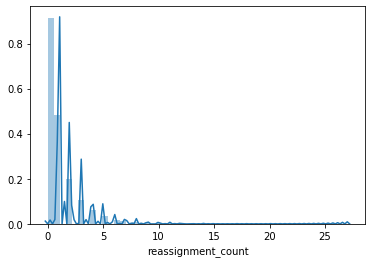

**************************************************
reopen_count
skewness : 15.56360442759793


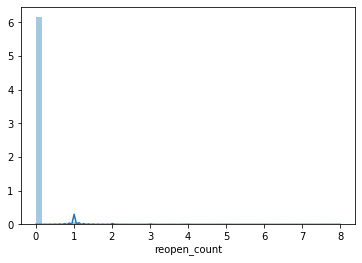

**************************************************
sys_mod_count
skewness : 4.74289730354474


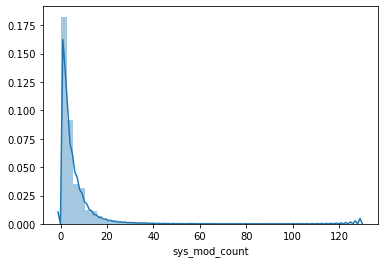

**************************************************


In [26]:
for i in numerical_data1:
    print(i)
    print('skewness :',data1[i].skew())
    sns.distplot(data1[i])
    plt.show()
    print('*'*50)

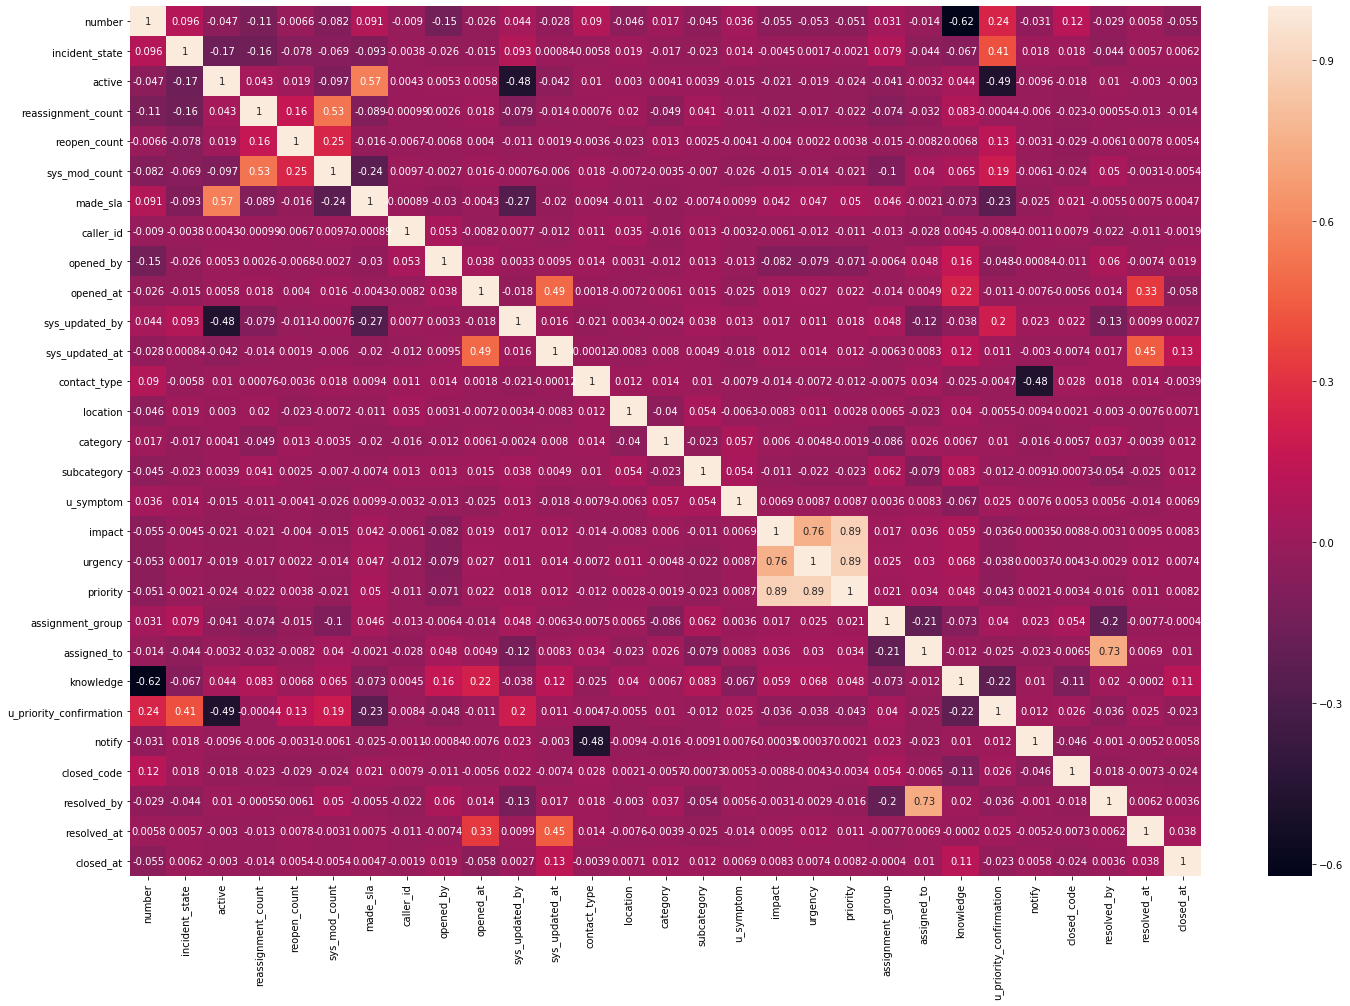

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2 = data1.apply(le.fit_transform)
plt.figure(figsize = (24,16))
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [28]:
abs(data2.corr()['closed_at']).sort_values(ascending = False)

closed_at                  1.000000
sys_updated_at             0.134666
knowledge                  0.114020
opened_at                  0.058032
number                     0.055250
resolved_at                0.037893
closed_code                0.023826
u_priority_confirmation    0.022618
opened_by                  0.019050
reassignment_count         0.014046
subcategory                0.012067
category                   0.012026
assigned_to                0.010067
impact                     0.008256
priority                   0.008153
urgency                    0.007436
location                   0.007122
u_symptom                  0.006950
incident_state             0.006210
notify                     0.005760
reopen_count               0.005403
sys_mod_count              0.005360
made_sla                   0.004730
contact_type               0.003882
resolved_by                0.003564
active                     0.003007
sys_updated_by             0.002747
caller_id                  0

In [29]:
numerical_data1 = data1.select_dtypes(include=[np.number])
categorical_data1 = data1.select_dtypes(exclude=[np.number])
print(numerical_data1.shape,categorical_data1.shape)
print('The number of rows in the Numerical data after dropping null values', numerical_data1.shape[0])
print('The number of columns in the Numerical data after dropping null values', numerical_data1.shape[1])
print('The number of rows in the Categorical data after dropping null values', categorical_data1.shape[0])
print('The number of columns in the Categorical data after dropping null values', categorical_data1.shape[1])


(141712, 0) (141712, 29)
The number of rows in the Numerical data after dropping null values 141712
The number of columns in the Numerical data after dropping null values 0
The number of rows in the Categorical data after dropping null values 141712
The number of columns in the Categorical data after dropping null values 29


In [30]:
from scipy.stats import chi2_contingency

In [31]:
categorical_datadrop=categorical_data1.drop('closed_at',axis=1)

In [ ]:
non_sigificant=[]
for i in categorical_datadrop:
    print(i)
    print('H0:',i, 'is not significant to closed_at')
    print('Ha:',i,'is significant to closed_at')
    obs = pd.crosstab(data2[i],data2['closed_at'])
    chi, p_val, ddof, expected = chi2_contingency(obs)
    print('pval : ', p_val)
    if p_val<0.05:
        print('We are rejecting the null hypothesis', i , 'is significant to closed_at\n')
    else:
        print('We are accepting the null hypothesis', i, 'is not significant to closed_at\n')
        non_sigificant.append(i)
print('The Varible not significant to closed_at is', non_sigificant)

number
H0: number is not significant to closed_at
Ha: number is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis number is significant to closed_at

incident_state
H0: incident_state is not significant to closed_at
Ha: incident_state is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis incident_state is significant to closed_at

active
H0: active is not significant to closed_at
Ha: active is significant to closed_at
pval :  0.9038401186262924
We are accepting the null hypothesis active is not significant to closed_at

reassignment_count
H0: reassignment_count is not significant to closed_at
Ha: reassignment_count is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis reassignment_count is significant to closed_at

reopen_count
H0: reopen_count is not significant to closed_at
Ha: reopen_count is significant to closed_at
pval :  0.0
We are rejecting the null hypothesis reopen_count is significant to closed_at

sys_mod

In [ ]:
categorical_data2.head(5)

In [ ]:
X=data2.drop("closed_at",axis=1)
y=data2["closed_at"]

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

X_constant=sm.add_constant(X)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({"vif":vif[1:]},index=X.columns).T